In [ ]:
import keras,os,cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import os
output_folder = "extracted_rar"
os.makedirs(output_folder, exist_ok=True)

!unrar x -o+ "10000.rar" {output_folder}

Streaming output truncated to the last 5000 lines.
Extracting  extracted_rar/10000/5/5_102.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_103.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_104.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_105.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_106.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_107.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_108.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_109.jpg                               47%  OK 
Extracting  extracted_rar/10000/5/5_11.jpg                                47%  OK 
Extracting  extracted_rar/10000/5/5_110.jpg                               47%  OK 
Extracting  extracted_rar/100

In [ ]:

import os
import numpy as np
import pandas as pd
from PIL import Image

extract_folder = "extracted_rar"
output_csv = "image_data.csv"

data = []

image_size = (28, 28)
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        file_path = os.path.join(root, file)
        if file.lower().endswith(("png", "jpg", "jpeg", "bmp", "gif")):
            label = os.path.basename(root)

            image = Image.open(file_path).convert("L")

            image = image.resize(image_size)

            image_array = np.array(image).flatten()
            data.append([label] + image_array.tolist())

columns = ["label"] + [f"pixel_{i}" for i in range(image_size[0] * image_size[1])]
df = pd.DataFrame(data, columns=columns)

df.to_csv(output_csv, index=False)
print(f"it is saved in {output_csv}")


it is saved in image_data.csv


In [ ]:

output_csv = "image_data.csv"

df = pd.read_csv(output_csv)
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,2,184,182,182,186,184,182,186,186,185,...,184,185,185,184,184,184,178,150,157,183
1,2,99,175,181,175,179,181,179,177,177,...,182,180,179,179,179,180,180,179,178,178
2,2,144,141,140,142,142,141,142,142,141,...,122,105,106,113,114,132,120,47,32,91
3,2,139,139,139,140,140,140,141,142,142,...,147,143,136,131,126,124,123,124,125,126
4,2,135,134,134,134,133,136,136,140,96,...,70,68,67,65,65,75,98,83,21,47


In [ ]:

df.head(3030)

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,2,184,182,182,186,184,182,186,186,185,...,184,185,185,184,184,184,178,150,157,183
1,2,99,175,181,175,179,181,179,177,177,...,182,180,179,179,179,180,180,179,178,178
2,2,144,141,140,142,142,141,142,142,141,...,122,105,106,113,114,132,120,47,32,91
3,2,139,139,139,140,140,140,141,142,142,...,147,143,136,131,126,124,123,124,125,126
4,2,135,134,134,134,133,136,136,140,96,...,70,68,67,65,65,75,98,83,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,3,168,169,169,170,169,169,169,169,169,...,169,171,171,169,171,170,171,171,169,169
3026,3,20,57,179,192,182,180,181,181,181,...,187,186,186,184,184,184,184,184,184,183
3027,3,149,154,153,149,153,156,154,153,154,...,150,152,145,144,150,156,158,152,143,147
3028,3,186,186,185,184,185,184,182,181,181,...,186,188,186,185,185,185,186,182,161,138


In [ ]:
import pandas as pd # Make sure pandas is imported

# Assuming 'data' is your list of lists
df = pd.DataFrame(data, columns=["label"] + [f"pixel_{i}" for i in range(784)])  # Assuming 784 pixel values
labels = df["label"].values
images = df.iloc[:, 1:].values

In [ ]:
print(f"number of image :{images.shape[0]}")
print(f"number of pexil for every image: {images.shape[1]}")

number of image :10000
number of pexil for every image: 784


In [ ]:
image_size = (28, 28)
images_reshaped = images.reshape(-1, *image_size)

In [ ]:
images_reshaped.shape

(10000, 28, 28)

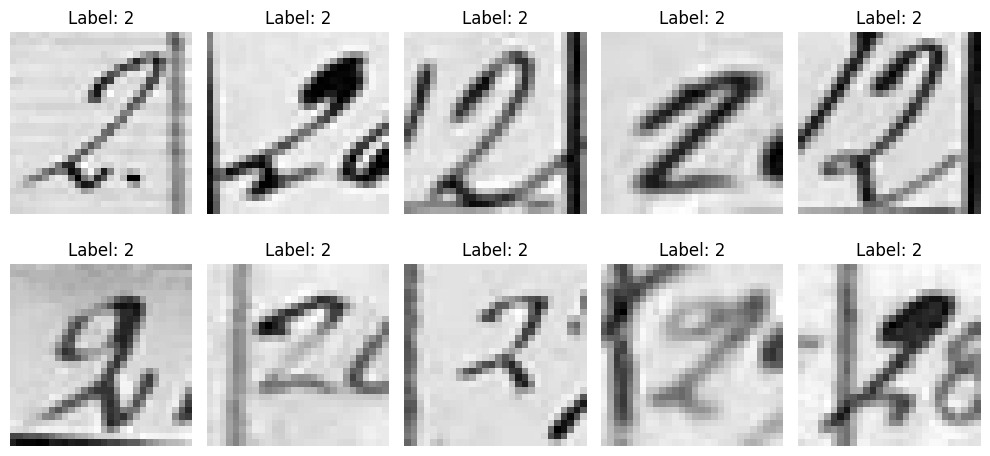

In [ ]:
num_images_to_display = 10
plt.figure(figsize=(10, 5))

for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_reshaped[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {labels[i]}")

plt.tight_layout()
plt.show()

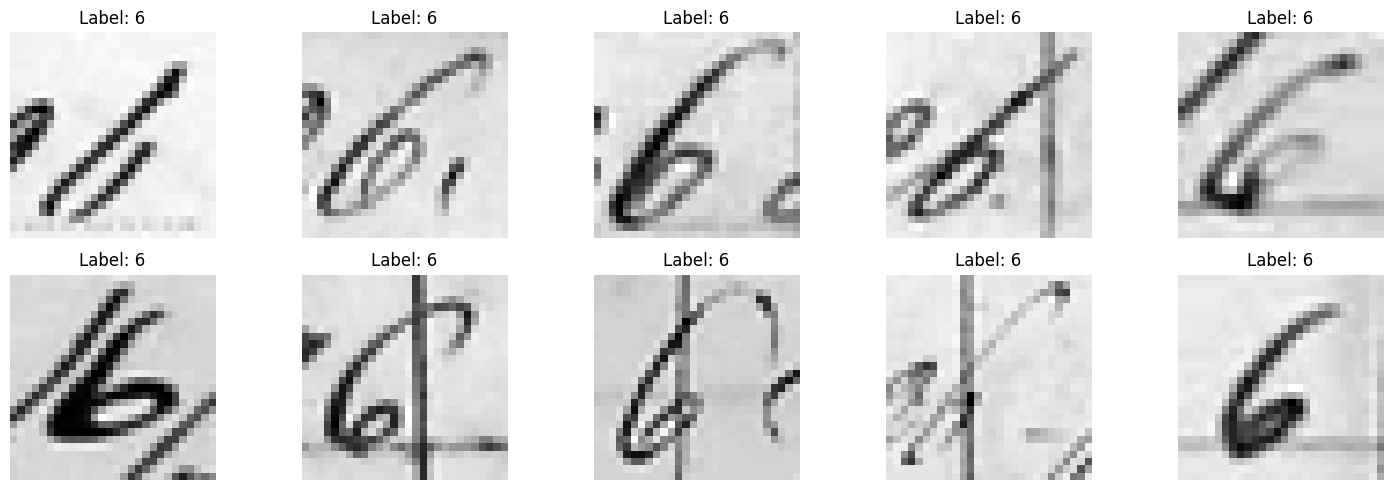

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

start_index =1500
end_index = 1510

plt.figure(figsize=(15, 5))

for i in range(start_index, end_index):
    plt.subplot(2, 5, i - start_index + 1)
    image = images[i].reshape(28, 28)
    label = labels[i]

    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {label}")

plt.tight_layout()
plt.show()


In [ ]:
images = images.reshape(images.shape[0], -1)

In [ ]:

images.shape

(10000, 784)

In [ ]:
image_shapes =images.shape[1]
if image_shapes == 784:
    print(f"All images have the correct size: 28x28 ({image_shapes} pixels)")
else:
    print(f"Some images have an incorrect size! Expected 784 pixels but found {image_shapes}.")

All images have the correct size: 28x28 (784 pixels)


In [ ]:
images = images / 255.0

In [ ]:
import numpy as np
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"train size {X_train.shape}, {y_train.shape}")
print(f"test szie:{X_test.shape}, {y_test.shape}")

train size (8000, 784), (8000,)
test szie:(2000, 784), (2000,)


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import time


In [ ]:

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=700,
    random_state=42
)

In [ ]:
start_time = time.time()
mlp.fit(X_train, y_train)
end_time = time.time()


In [ ]:
mlp_fit_time = end_time - start_time
print(f"Training Time: {mlp_fit_time:.4f} seconds")

Training Time: 79.6767 seconds


In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.4f}")


recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8270
Precision: 0.8315
Recall: 0.8279
F1-Score: 0.8263

Confusion Matrix:
[[179   2   0   5   3   3   4   3   4   9]
 [  1 196   1   1   3   1   0   5   2   1]
 [  0   6 151   3   3   5   0  16  12  12]
 [  4   1   5 167   1   4   2  10   2   5]
 [  1   6   0   1 153   0   5  12   3  11]
 [  1   0   4  10   3 163   6   6   5   6]
 [  6   2   1   0   3  13 161   2  13   1]
 [  0   3   0   2   1   0   0 161   0   8]
 [  4   3   4   5   5   2   3   8 170   5]
 [  0   2   1   9   8   1   0   9   3 153]]


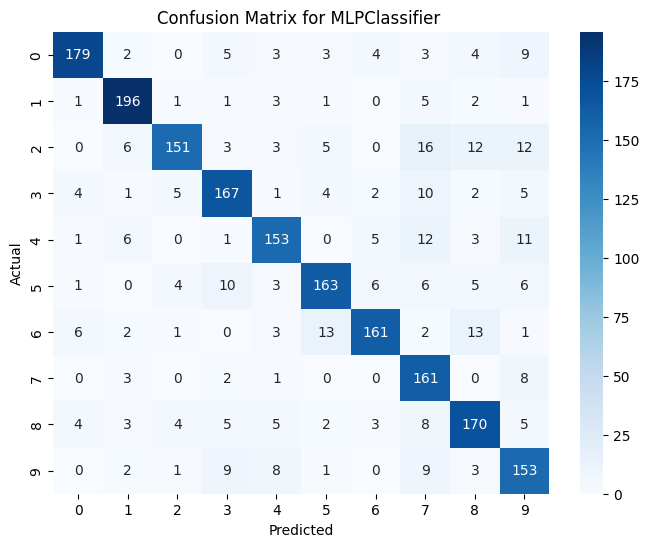

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for MLPClassifier ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

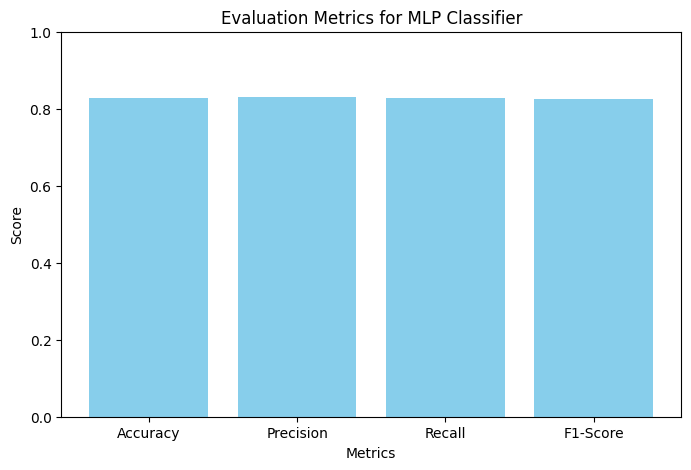

In [ ]:
metrics = {
    'MLP Classifier': {'Accuracy': 0.8270, 'Precision': 0.8315, 'Recall': 0.8279, 'F1-Score': 0.8263}
}

for model, metric_values in metrics.items():
    plt.figure(figsize=(8, 5))
    plt.bar(metric_values.keys(), metric_values.values(), color='skyblue')
    plt.title(f'Evaluation Metrics for {model}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
mlp_cross = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=700,
    random_state=42
)

score = cross_validate(mlp_cross, X_train, y_train,  cv=5, return_train_score=True )

In [ ]:
score["train_score"].mean()

0.95409375

In [ ]:
score["test_score"].mean()

0.8248750000000001

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(128, 64), (64, 32) ],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive'],
    'max_iter': [500, 700]
}



In [ ]:
mlp_grid = MLPClassifier(random_state=42)

grid_search = GridSearchCV(
    mlp_grid, param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(128, 64), (64, 32)],
                         'learning_rate': ['adaptive'], 'max_iter': [500, 700],
                         'solver': ['adam']},
             scoring='accuracy', verbose=2)

In [ ]:
grid_search.cv_results_["mean_test_score"].mean()

0.817625

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(128, 64),
              learning_rate='adaptive', max_iter=500, random_state=42)

LogisticRegression

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    max_iter=1200,
    random_state=42
)

start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

log_reg_fit_time = end_time - start_time
print(f"Training Time: {log_reg_fit_time:.4f} seconds")

y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Time: 19.6906 seconds


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7440
Precision: 0.7415
Recall: 0.7424
F1-Score: 0.7417

Confusion Matrix:
[[170   4   2   7   7   7   5   2   3   5]
 [  5 174   4   1   2   4   3   9   6   3]
 [  2   5 155  13   3   2   3   7  11   7]
 [  7   4   5 158   6   3   2   5   6   5]
 [  6   5   2   4 138   3   5   6  12  11]
 [ 16   4   6   5   2 145   8   6   9   3]
 [  0   3   2   0   4  13 169   1  10   0]
 [  1   9  13   5   6   1   0 117   4  19]
 [  3   8   6   9  11  16  12   6 131   7]
 [  7   4   6   9   7   2   0  16   4 131]]


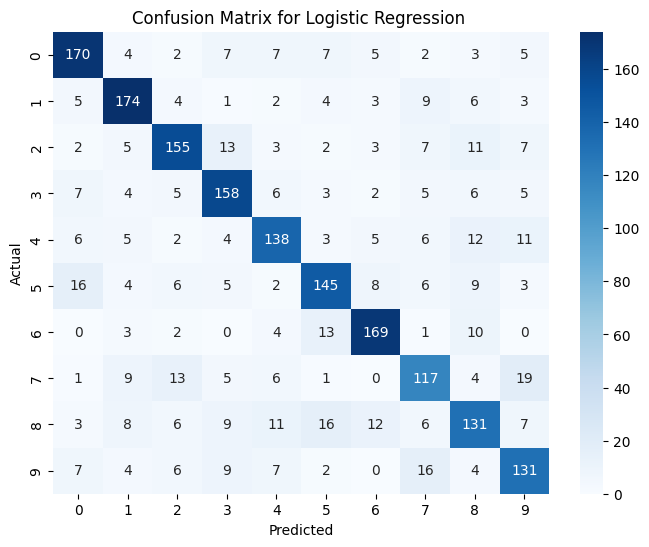

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

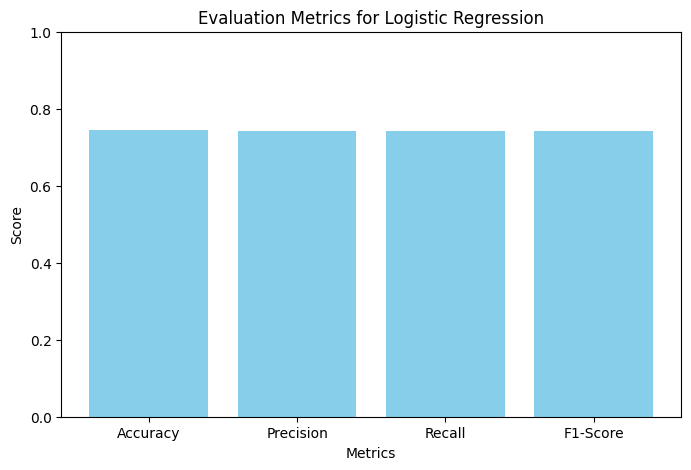

In [ ]:
metrics = {
    'Logistic Regression': {'Accuracy':0.7440, 'Precision':0.7415 , 'Recall': 0.7424, 'F1-Score': 0.7417}
}

for model, metric_values in metrics.items():
    plt.figure(figsize=(8, 5))
    plt.bar(metric_values.keys(), metric_values.values(), color='skyblue')
    plt.title(f'Evaluation Metrics for {model}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

Cross-validation - Logistic

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    max_iter=500,
    random_state=42
)


score = cross_validate(
    log_reg, X_train, y_train,  cv=5, return_train_score=True
)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
score["train_score"].mean()

0.8516250000000001

In [ ]:
score["test_score"].mean()

0.750625

Grid-seach Logistic

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

log_reg = LogisticRegression(random_state=42, max_iter=500)

param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'fit_intercept': [True, False],
}


In [ ]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    refit='accuracy',   # Use accuracy for model selection
    cv=5,
    return_train_score=True,
    verbose=2           # Print progress
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   6.9s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   7.5s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   9.6s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   5.2s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   7.9s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear; total time=   9.2s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear; total time=   9.6s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear; total time=  11.0s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear; total time=   9.0s
[CV] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear; total time=   9.6s
[CV] END C=0.01, fit_intercept=False, penalty=l2, solver=lbfgs; total time=   1.9s
[CV] END C=0.01,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10, fit_intercept=True, penalty=l2, solver=lbfgs; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10, fit_intercept=True, penalty=l2, solver=lbfgs; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10, fit_intercept=True, penalty=l2, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10, fit_intercept=True, penalty=l2, solver=lbfgs; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10, fit_intercept=True, penalty=l2, solver=lbfgs; total time=  23.1s
[CV] END C=10, fit_intercept=True, penalty=l2, solver=liblinear; total time=  57.3s
[CV] END C=10, fit_intercept=True, penalty=l2, solver=liblinear; total time=  57.0s
[CV] END C=10, fit_intercept=True, penalty=l2, solver=liblinear; total time=  57.9s
[CV] END C=10, fit_intercept=True, penalty=l2, solver=liblinear; total time=  59.3s
[CV] END C=10, fit_intercept=True, penalty=l2, solver=liblinear; total time=  58.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=False, penalty=l2, solver=lbfgs; total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=False, penalty=l2, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=False, penalty=l2, solver=lbfgs; total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=False, penalty=l2, solver=lbfgs; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=False, penalty=l2, solver=lbfgs; total time=  25.0s
[CV] END C=10, fit_intercept=False, penalty=l2, solver=liblinear; total time= 1.0min
[CV] END C=10, fit_intercept=False, penalty=l2, solver=liblinear; total time=  59.3s
[CV] END C=10, fit_intercept=False, penalty=l2, solver=liblinear; total time=  59.8s
[CV] END C=10, fit_intercept=False, penalty=l2, solver=liblinear; total time= 1.1min
[CV] END C=10, fit_intercept=False, penalty=l2, solver=liblinear; total time=  59.3s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             refit='accuracy', return_train_score=True, verbose=2)

In [ ]:
print("Logistic Regression Mean Train Score:", grid_search.cv_results_['mean_train_score'].mean())
print("Logistic Regression Mean Test Score:", grid_search.cv_results_['mean_test_score'].mean())

Logistic Regression Mean Train Score: 0.817009765625
Logistic Regression Mean Test Score: 0.73490625


In [ ]:
print("Logistic Regression Best Estimator:", grid_search.best_estimator_)

Logistic Regression Best Estimator: LogisticRegression(C=0.1, fit_intercept=False, max_iter=500, random_state=42)


**Naive bayes**

In [ ]:
import time
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

gnb = GaussianNB()

start_time = time.time()
gnb.fit(X_train, y_train)
end_time = time.time()

gnb_fit_time = end_time - start_time
print(f"Training Time: {gnb_fit_time:.4f} seconds")
y_pred = gnb.predict(X_test)


Training Time: 0.1602 seconds


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.5055
Precision: 0.5360
Recall: 0.5037
F1-Score: 0.5071

Confusion Matrix:
[[123  27   4  11  16   7  12   1   4   7]
 [  2 152   4  14   5   3  10  13   8   0]
 [  4  51  74  40  10   1   3   5  18   2]
 [ 13  21  13 123   6   2   1   5  11   6]
 [ 19  31   9   6  78   2   7   9  23   8]
 [  9  42   6   4  10  94  12   5  16   6]
 [ 12  29   1   2  11  16 117   3  11   0]
 [  4  34  10   7   9   2   2  81  14  12]
 [  2  32  10  12  18  24  16   5  82   8]
 [ 12  24   4  27   9   2   1  14   6  87]]


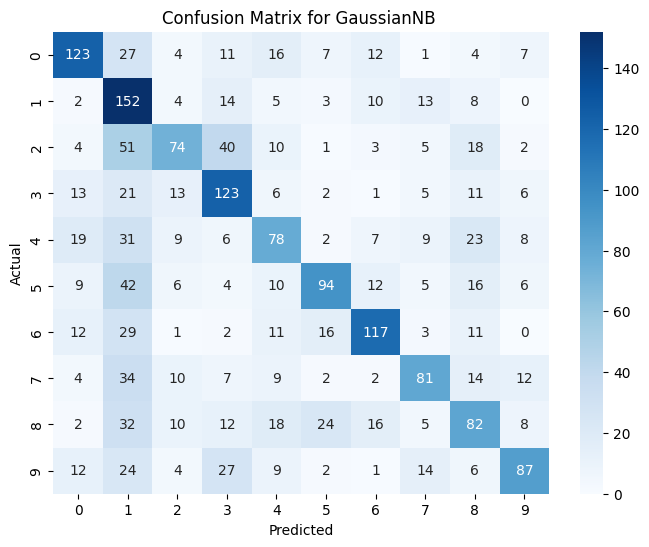

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for GaussianNB ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

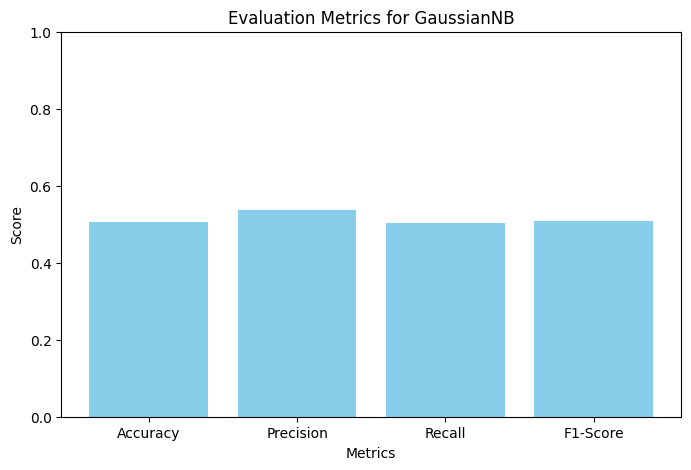

In [ ]:
metrics = {
    'GaussianNB': {'Accuracy':0.5055, 'Precision':0.5360 , 'Recall': 0.5037, 'F1-Score': 0.5071}
}

for model, metric_values in metrics.items():
    plt.figure(figsize=(8, 5))
    plt.bar(metric_values.keys(), metric_values.values(), color='skyblue')
    plt.title(f'Evaluation Metrics for {model}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

**Cross-validation Naive bayes**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

gnb = GaussianNB()


score = cross_validate(
    gnb, X_train, y_train,  cv=5, return_train_score=True
)

In [ ]:
score["train_score"].mean()

0.532125

In [ ]:
score["test_score"].mean()

0.5119999999999999

**Linear regression**

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lin_reg = LinearRegression()
ova = OneVsRestClassifier(lin_reg)

start_time = time.time()
ova.fit(X_train, y_train)
end_time = time.time()

lin_reg_fit_time = end_time - start_time
print(f"Training Time: {lin_reg_fit_time:.4f} seconds")

y_pred = ova.predict(X_test)


Training Time: 13.6084 seconds


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.6555
Precision: 0.6548
Recall: 0.6541
F1-Score: 0.6519

Confusion Matrix:
[[155   6   5   7   9   4  10   3   2  11]
 [  5 154   9   1  12   2   7  11   6   4]
 [  3   7 133  21   5   4   7  10   6  12]
 [ 10   4  11 145   7   4   5   7   3   5]
 [  2   9   3   2 134   4  13   4  13   8]
 [ 12   3   4   4  10 119  20  21   5   6]
 [  4   7   4   4   9  13 154   1   5   1]
 [  1  15  10   5   4   5   2 101   3  29]
 [  2  10   6  16  12  19  17  11 106  10]
 [ 10   8   6  13  10   5   2  15   7 110]]


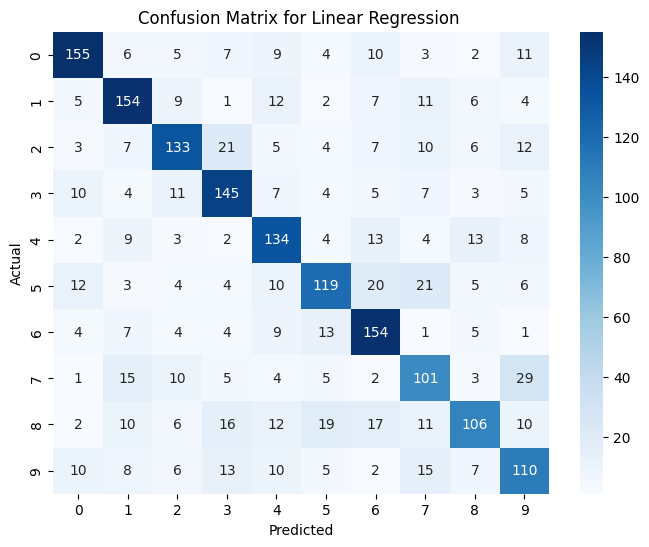

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Linear Regression ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

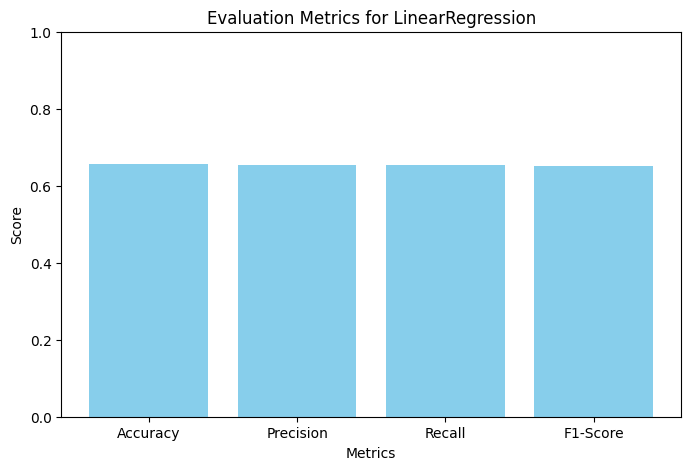

In [ ]:
metrics = {
    'LinearRegression': {'Accuracy':0.6555, 'Precision':0.6548, 'Recall':0.6541 , 'F1-Score':0.6519 }
}

for model, metric_values in metrics.items():
    plt.figure(figsize=(8, 5))
    plt.bar(metric_values.keys(), metric_values.values(), color='skyblue')
    plt.title(f'Evaluation Metrics for {model}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

**Cross-validation Linear**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

lin_reg = LinearRegression()
ova = OneVsRestClassifier(lin_reg)

score = cross_validate(
    ova, X_train, y_train,  cv=5, return_train_score=True
)

In [ ]:
score["train_score"].mean()

0.811125

In [ ]:
score["test_score"].mean()

0.6399999999999999